In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset, info = tfds.load('tf_flowers', with_info=True, as_supervised=True)

In [4]:
class_names = info.features['label'].names

In [5]:
class_names

['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']

In [7]:
IMG_SIZE = 160

def format_example(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE)) / 255.0
    return image, label
    

In [10]:
train_ds  = dataset['train'].take(360).map(format_example).batch(32)

In [11]:
val_ds = dataset['train'].skip(360).take(300).map(format_example).batch(32)

In [12]:
test_ds = dataset['train'].skip(660).map(format_example).batch(32)

# Build Model

In [19]:
def build_model(base_model, name="Model"):
    base_model.trainable = False
    model = models.Sequential([
                base_model,
                layers.GlobalAveragePooling2D(),
                layers.Dense(128, activation='relu'),
                layers.Dropout(0.5),
                layers.Dense(5, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model._name = name
    return model
    

In [20]:
mobilenet = tf.keras.applications.MobileNetV2(
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top = False,
    weights='imagenet'
)

    

In [21]:
train_ds

<_BatchDataset element_spec=(TensorSpec(shape=(None, 160, 160, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [22]:
val_ds

<_BatchDataset element_spec=(TensorSpec(shape=(None, 160, 160, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [23]:
model_mobilenet = build_model(mobilenet, "MobileNetV2")

history_mobilenet = model_mobilenet.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
 2/12 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.2578 - loss: 2.0476

2025-11-09 10:24:53.350573: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:387] The default buffer size is 262144, which is overridden by the user specified `buffer_size` of 8388608


11/12 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.3538 - loss: 1.7303

2025-11-09 10:24:53.919174: W tensorflow/core/kernels/data/cache_dataset_ops.cc:916] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 141ms/step - accuracy: 0.3703 - loss: 1.6820 - val_accuracy: 0.7433 - val_loss: 0.7135
Epoch 2/10


2025-11-09 10:24:54.841507: W tensorflow/core/kernels/data/cache_dataset_ops.cc:916] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


11/12 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.8253 - loss: 0.5101

2025-11-09 10:24:55.571489: W tensorflow/core/kernels/data/cache_dataset_ops.cc:916] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - accuracy: 0.8231 - loss: 0.5132 - val_accuracy: 0.8233 - val_loss: 0.5156
Epoch 3/10


2025-11-09 10:24:56.155858: W tensorflow/core/kernels/data/cache_dataset_ops.cc:916] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


11/12 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.8757 - loss: 0.4170

2025-11-09 10:24:56.880575: W tensorflow/core/kernels/data/cache_dataset_ops.cc:916] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - accuracy: 0.8765 - loss: 0.4117 - val_accuracy: 0.8233 - val_loss: 0.4534
Epoch 4/10


2025-11-09 10:24:57.484636: W tensorflow/core/kernels/data/cache_dataset_ops.cc:916] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


11/12 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.8963 - loss: 0.3579

2025-11-09 10:24:58.211410: W tensorflow/core/kernels/data/cache_dataset_ops.cc:916] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - accuracy: 0.8969 - loss: 0.3526 - val_accuracy: 0.8400 - val_loss: 0.4038
Epoch 5/10


2025-11-09 10:24:58.814359: W tensorflow/core/kernels/data/cache_dataset_ops.cc:916] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


11/12 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9588 - loss: 0.1635

2025-11-09 10:24:59.561156: W tensorflow/core/kernels/data/cache_dataset_ops.cc:916] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - accuracy: 0.9574 - loss: 0.1659 - val_accuracy: 0.8367 - val_loss: 0.3986
Epoch 6/10


2025-11-09 10:25:00.179783: W tensorflow/core/kernels/data/cache_dataset_ops.cc:916] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


11/12 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9667 - loss: 0.1477

2025-11-09 10:25:00.935120: W tensorflow/core/kernels/data/cache_dataset_ops.cc:916] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - accuracy: 0.9663 - loss: 0.1467 - val_accuracy: 0.8200 - val_loss: 0.4178
Epoch 7/10


2025-11-09 10:25:01.553642: W tensorflow/core/kernels/data/cache_dataset_ops.cc:916] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


11/12 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9710 - loss: 0.0945

2025-11-09 10:25:02.301061: W tensorflow/core/kernels/data/cache_dataset_ops.cc:916] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - accuracy: 0.9703 - loss: 0.0957 - val_accuracy: 0.8267 - val_loss: 0.4299
Epoch 8/10


2025-11-09 10:25:02.925241: W tensorflow/core/kernels/data/cache_dataset_ops.cc:916] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


11/12 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.9728 - loss: 0.1020

2025-11-09 10:25:03.658520: W tensorflow/core/kernels/data/cache_dataset_ops.cc:916] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - accuracy: 0.9736 - loss: 0.1004 - val_accuracy: 0.8500 - val_loss: 0.4115
Epoch 9/10


2025-11-09 10:25:04.269614: W tensorflow/core/kernels/data/cache_dataset_ops.cc:916] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


11/12 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.9756 - loss: 0.1065

2025-11-09 10:25:05.010063: W tensorflow/core/kernels/data/cache_dataset_ops.cc:916] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - accuracy: 0.9755 - loss: 0.1050 - val_accuracy: 0.8200 - val_loss: 0.4271
Epoch 10/10


2025-11-09 10:25:05.675089: W tensorflow/core/kernels/data/cache_dataset_ops.cc:916] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


11/12 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9897 - loss: 0.0708

2025-11-09 10:25:06.423910: W tensorflow/core/kernels/data/cache_dataset_ops.cc:916] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - accuracy: 0.9896 - loss: 0.0699 - val_accuracy: 0.8233 - val_loss: 0.4517


2025-11-09 10:25:07.068580: W tensorflow/core/kernels/data/cache_dataset_ops.cc:916] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [28]:
def show_predictions(model, dataset, num_images=5):
    for images, labels in dataset.take(1):
        preds = model.predict(images)
        for i in range(num_images):
            plt.figure(figsize=(4,2))
            plt.imshow(images[i])
            plt.title(f"Actual: {class_names[labels[i]]} | Pred: {class_names[np.argmax(preds[i])]}")
            plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


2025-11-09 10:40:30.283777: W tensorflow/core/kernels/data/cache_dataset_ops.cc:916] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


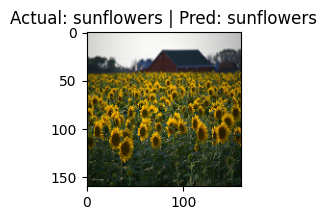

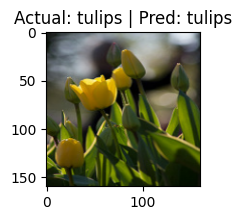

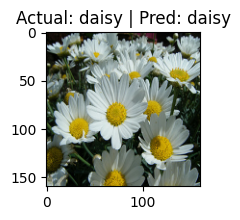

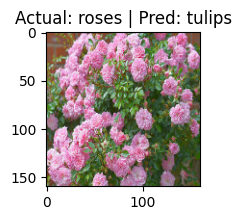

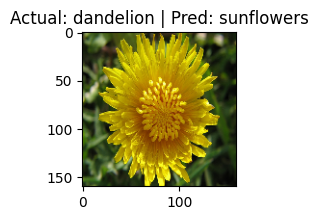

2025-11-09 10:40:30.512131: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [29]:
show_predictions(model_mobilenet, test_ds)